__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
samples = pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
length = samples[0].count()

In [3]:
mean = samples[0].sum() / length
print(f'среднее по формуле: {mean}, стат.методом: {samples[0].mean()}')

среднее по формуле: 65.3, стат.методом: 65.3


In [4]:
sigma_biased = np.sqrt(((samples[0] - mean)**2).sum() / length)
print(f'ср.квадр.отклонение по формуле: {sigma_biased}, стат.методом: {samples[0].std(ddof=0)}')

ср.квадр.отклонение по формуле: 30.823854398825596, стат.методом: 30.823854398825596


In [5]:
sigma_unbiased = np.sqrt(((samples[0] - mean)**2).sum() / (length - 1))
(sigma_unbiased, samples[0].std(ddof=1))

(31.624607341019814, 31.624607341019814)

In [6]:
D_biased = sigma_biased**2
print(f'смещённая дисперсия по формуле: {D_biased}, стат.методом: {samples[0].var(ddof=0)}')

смещённая дисперсия по формуле: 950.11, стат.методом: 950.11


In [7]:
D_unbiased = sigma_unbiased**2
print(f'несмещённая дисперсия по формуле: {D_unbiased}, стат.методом: {samples[0].var(ddof=1)}')

несмещённая дисперсия по формуле: 1000.1157894736843, стат.методом: 1000.1157894736842


__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [8]:
(quartile_1, quartile_3) = samples[0].quantile([0.25, 0.75])
(quartile_1, quartile_3)

(42.0, 81.0)

In [9]:
interquartile_dist = quartile_3 - quartile_1
interquartile_dist

39.0

<AxesSubplot:>

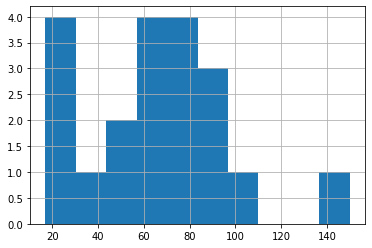

In [10]:
samples[0].hist(bins=10)

<AxesSubplot:>

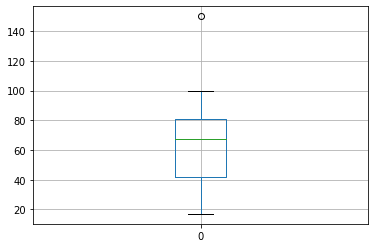

In [11]:
samples[[0]].boxplot()

In [12]:
boxplot_range = (quartile_1 - 1.5 * interquartile_dist, quartile_3 + 1.5 * interquartile_dist)
boxplot_range

(-16.5, 139.5)

In [13]:
outliers = samples.loc[(samples[0] < boxplot_range[0]) | (samples[0] > boxplot_range[1])]

outliers.shape[0]

1

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Вероятность того, что студент учится на каком-либо факультете при условии сдачи первой сессии, находим по формуле Байеса. Для этого сначала рассчитаем вероятность сдачи первой сессии по формуле полной вероятности, где вероятности попадания студента на факультет A равна $P(A) = \frac{1}{4}$, B - $P(B) = \frac{1}{4}$ и С - $P(C) = \frac{1}{2}$ (исходя из условий, на факультет А поступило х студентов, на В - х, на С - 2х, следовательно, общее количество студентов = 4х, отсюда и находим вероятности попадания студента в тот или иной факультет):

$$P(сессия) = P(A)\cdot P(сессия|A) + P(B)\cdot P(сессия|B) + P(С)\cdot P(сессия|C) = 0.25\cdot0.8 + 0.25\cdot0.7 + 0.5\cdot0.9 = \frac{33}{40} = 0.825$$

Теперь можно найти искомые вероятности:

$$a)\,\, P(A|сессия) = \frac{P(сессия|A)\cdot P(A)}{P(сессия)} = \frac{0.8\cdot0.25}{0.825} = \frac{8}{33}\approx 0.242$$

$$б)\,\, P(B|сессия) = \frac{P(сессия|B)\cdot P(B)}{P(сессия)} = \frac{0.7\cdot0.25}{0.825} = \frac{7}{33}\approx 0.212$$

$$в)\,\, P(C|сессия) = \frac{P(сессия|C)\cdot P(C)}{P(сессия)} = \frac{0.9\cdot0.5}{0.825} = \frac{18}{33}\approx 0.545$$